In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/googleplaystore.csv')
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [4]:
dataset.Installs.dropna(inplace=True)

In [5]:
def a(x):
  if 'and up' in str(x):
    return x.replace('and up','')
  else:
    pass

In [6]:
dataset['Android Ver'] = dataset['Android Ver'].apply(a)

In [7]:
dataset['Android Ver'].head()

0    4.0.3 
1    4.0.3 
2    4.0.3 
3      4.2 
4      4.4 
Name: Android Ver, dtype: object

In [8]:
def f(x):
  if '+' in x:
    return float(x[:-1].replace(",",""))
  else:
    pass

In [9]:
dataset.Installs = dataset['Installs'].apply(f)

In [10]:
def f(x):
  if '+ ' in x:
    return float(x[:-1].replace("+",""))

In [11]:
dataset.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [12]:
def fn(x):
  if 'M' in x:
    x = x.replace('M','')
    x = float(x)*1000000
  elif 'k' in x:
    x = x.replace('k','')
    x = float(x)*1000
  return x

In [13]:
dataset.Size = dataset.Size.apply(fn)

In [14]:
dataset.Size

0                19000000.0
1                14000000.0
2                 8700000.0
3                25000000.0
4                 2800000.0
                ...        
10836            53000000.0
10837             3600000.0
10838             9500000.0
10839    Varies with device
10840            19000000.0
Name: Size, Length: 10841, dtype: object

In [15]:
dataset.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [16]:
dataset.Reviews=pd.to_numeric(dataset.Reviews,errors='coerce') #ALSO WE XAN CHECK AT WHICH POSTION THE VALUE IS PRESENT TO DELETE IT .

In [17]:
dataset.duplicated().sum() #important

483

In [18]:
dataset.drop_duplicates(inplace=True)

In [19]:
dataset.shape

(10358, 13)

In [20]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              1
Size                 0
Installs             2
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver       1233
dtype: int64

In [22]:
dataset = pd.DataFrame(dataset)

In [23]:
dataset = dataset.fillna(method='bfill')

In [24]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  float64
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  float64
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [26]:
dataset.describe()

,Rating,Reviews,Installs
count,10358.000000,1.035800e+04,1.035800e+04
mean,4.187333,4.058784e+05,1.415832e+07
std,0.564751,2.696649e+06,8.023558e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.200000e+01,1.000000e+03
50%,4.300000,1.683000e+03,1.000000e+05
75%,4.500000,4.648275e+04,1.000000e+06
max,19.000000,7.815831e+07,1.000000e+09


In [27]:
def find_outlier_IQR(x):
  q1 = dataset.quantile(0.25)
  q3 = dataset.quantile(0.75)

  IQR = q3-q1
  upper = q3+1.5*IQR
  lower = q1-1.5*IQR
  for i in dataset:
    if i>upper or i<lower:
      outlier.append(i)
  return outlier

In [28]:
def non_outlier_IQR(dataset):
    # Select only numerical columns
    numeric_dataset = dataset.select_dtypes(include=[np.number])

    Q1 = numeric_dataset.quantile(0.25)
    Q3 = numeric_dataset.quantile(0.75)
    IQR = Q3 - Q1
    return dataset[~((numeric_dataset < (Q1 - 1.5 * IQR)) | (numeric_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
not_outlier = non_outlier_IQR(dataset)

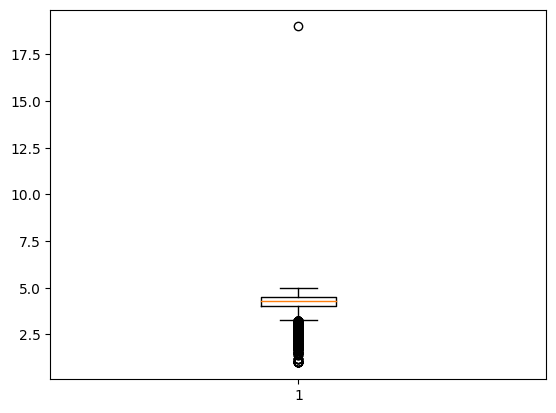

In [30]:
plt.boxplot(dataset['Rating'])
plt.show()

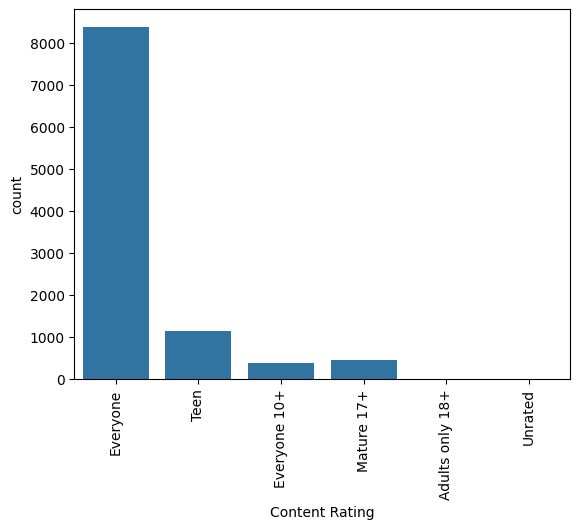

In [40]:
sns.countplot(x='Content Rating',data=dataset)
plt.xticks(rotation=90)
plt.show()

In [31]:
dataset.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3


In [32]:
dataset['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [33]:
rating = pd.pivot_table(dataset,index='App',values='Rating')
rating

,Rating
App,
"""i DT"" Fútbol. Todos Somos Técnicos.",4.4
+Download 4 Instagram Twitter,4.5
- Free Comics - Comic Apps,3.5
.R,4.5
/u/app,4.7
...,...
"뽕티비 - 개인방송, 인터넷방송, BJ방송",4.0
💎 I'm rich,3.8
"💘 WhatsLov: Smileys of love, stickers and GIF",4.6


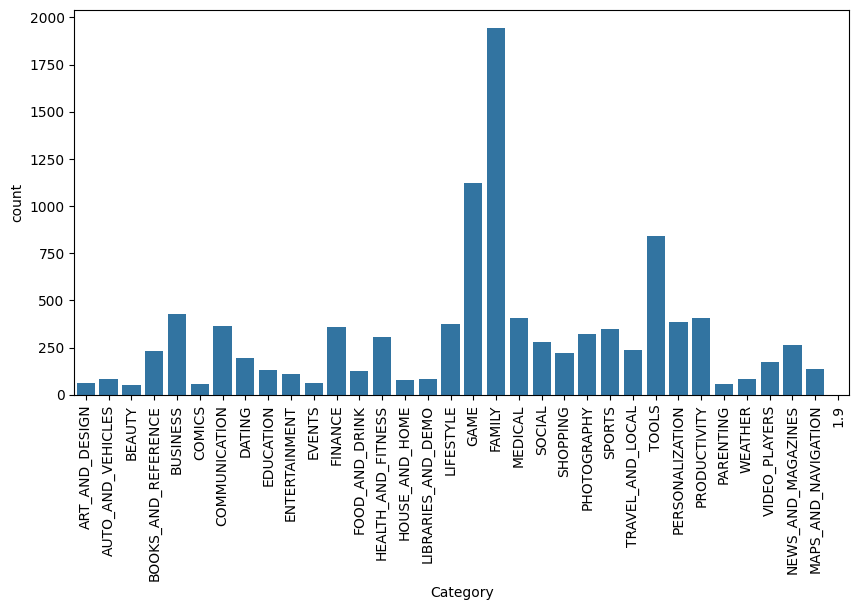

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=dataset)
plt.xticks(rotation=90)
plt.show()

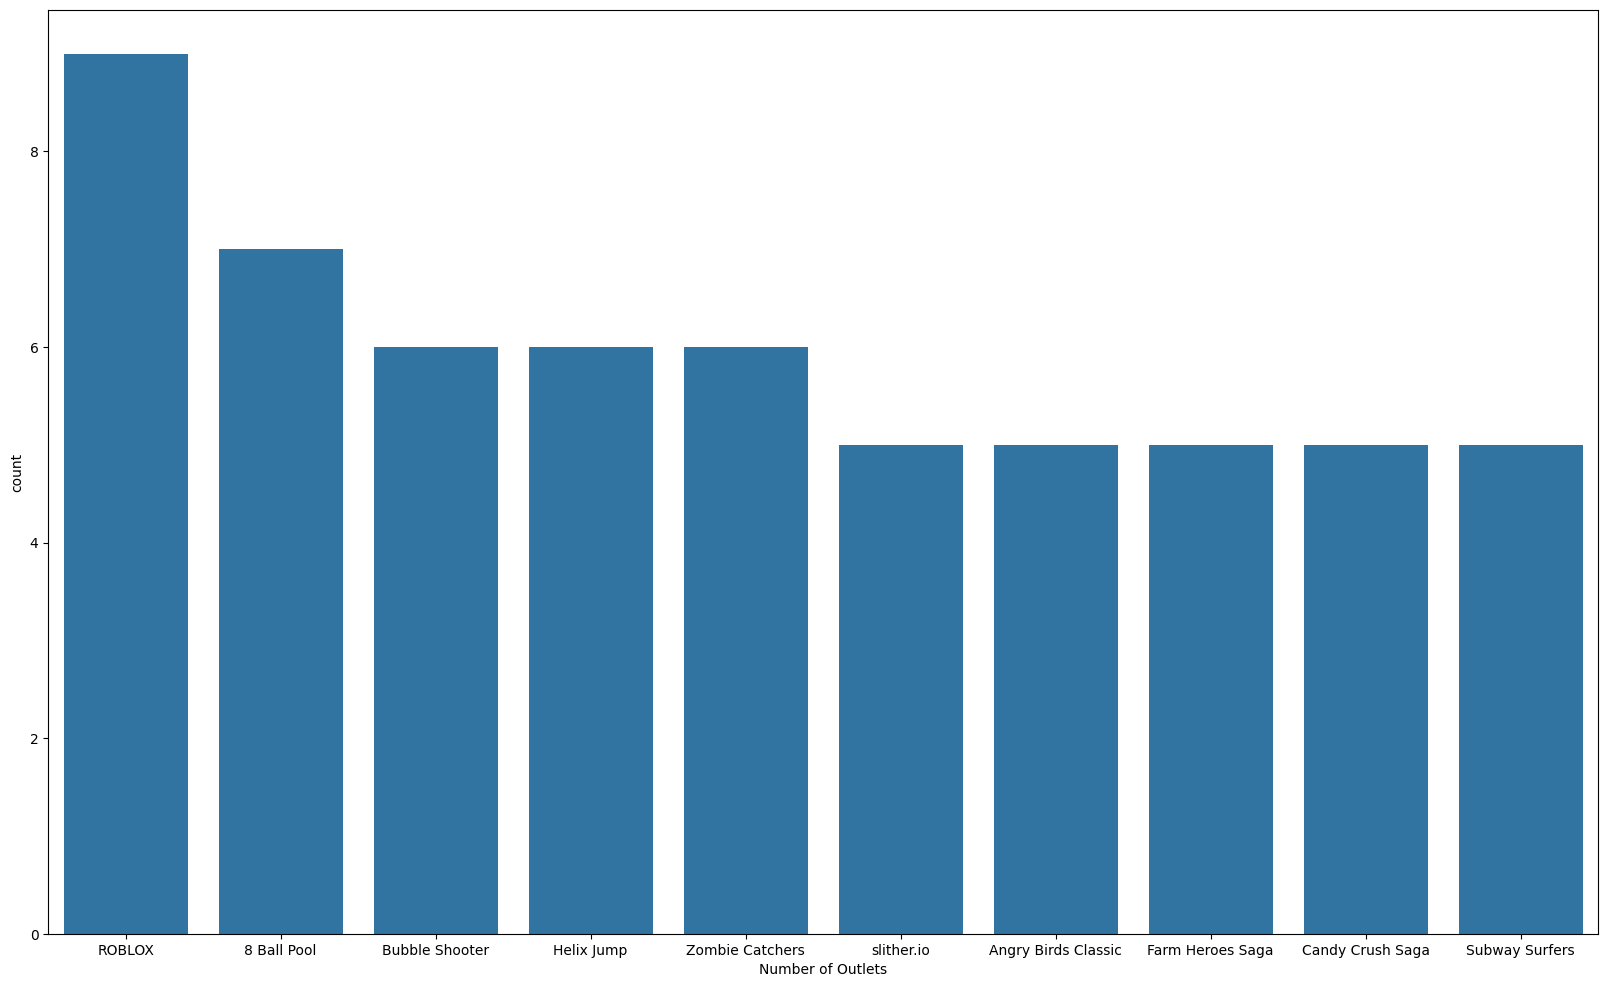

In [35]:
plt.figure(figsize=(20,12))
rest_typ = dataset['App'].value_counts()[0:10]
sns.barplot(x=rest_typ.index,y=rest_typ)
plt.xlabel('Number of Outlets')

plt.show()

<ipython-input-37-0aef8a7c1d25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rating'])


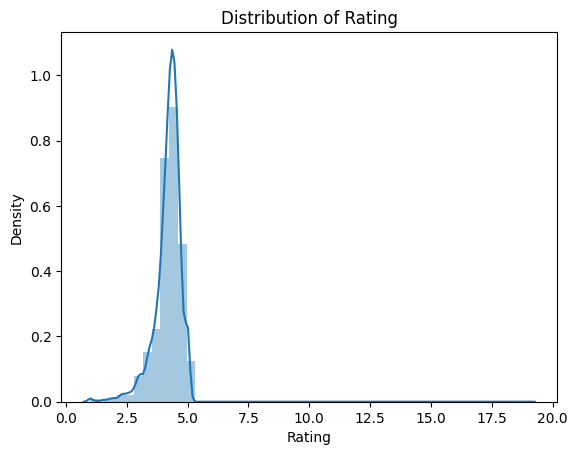

In [37]:
sns.distplot(dataset['Rating'])
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.show()